In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read_csv('address') method is used to read/load csv files from a targeted location
data = pd.read_csv('meteorites.csv') 

data.head()

,name,id,name_type,class,mass,fall,year,lat,long,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [2]:
#describe() method performs the basic operations such as count, mean, std, 25%ile, 50%ile, 75%ile on each columns(if possible)
data.describe()

,id,mass,year,lat,long
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [3]:
#####info() method#####
#it is used to check for null entries
#Total Entries:45716 but Columns(mass:45585,year:45425,lat:38401,long:38401,geolocation:38401) contain null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   name_type    45716 non-null  object 
 3   class        45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   lat          38401 non-null  float64
 8   long         38401 non-null  float64
 9   geolocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


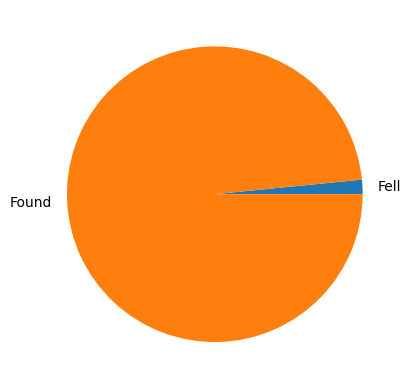

In [5]:
fig,ax = plt.subplots()
l5=data[data['class']=='L5'].iloc[:,5]
fellnfound = np.array([l5.loc[l5=='Fell'].count(),l5.loc[l5=='Found'].count()])
ax.pie(fellnfound,labels=(['Fell','Found']))
plt.show()

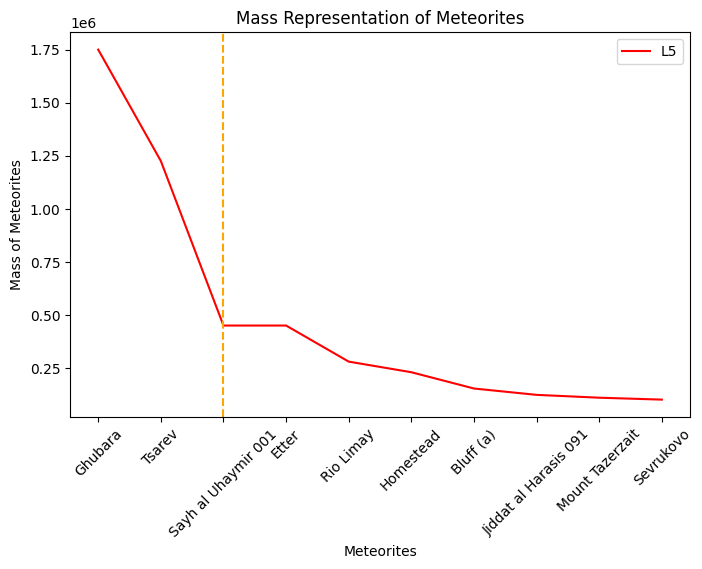

In [6]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(data[data['class']=='L5'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'name'].head(10),data[data['class']=='L5'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'mass'].head(10),label="L5",color='red',linestyle='-')
# ax.plot(data[data['class']=='H6'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'name'].head(10),data[data['class']=='H6'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'mass'].head(10),label="H6",color='yellow',linestyle='-')
ax.legend()
ax.set_xlabel("Meteorites")
ax.set_ylabel("Mass of Meteorites")
ax.set_title("Mass Representation of Meteorites")
ax.axvline(2,ls="--",color="orange")
# ax.axvline(12,ls="--",color="brown")
plt.xticks(rotation=45)
plt.show()

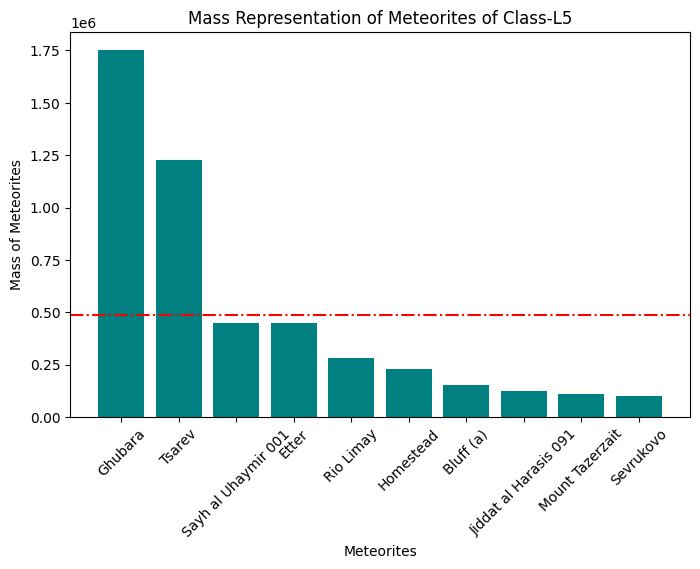

In [23]:
# data[data['class']=='L5'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'mass']
fig,ax = plt.subplots(figsize=(8,5))
ax.bar(data[data['class']=='L5'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'name'].head(10),height=data[data['class']=='L5'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'mass'].head(10),color="teal")
# ax.bar(data[data['class']=='EH4'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'name'].head(10),height=data[data['class']=='EH4'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'mass'].head(10),color="red")

ax.axhline(data[data['class']=='L5'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'mass'].head(10).mean(),ls="-.",color="red")
ax.set_xlabel("Meteorites")
ax.set_ylabel("Mass of Meteorites")
ax.set_title("Mass Representation of Meteorites of Class-L5")
plt.xticks(rotation=45)
plt.show()

(array([1860., 1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020.]),
 [Text(1860.0, 0, '1860'),
  Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020')])

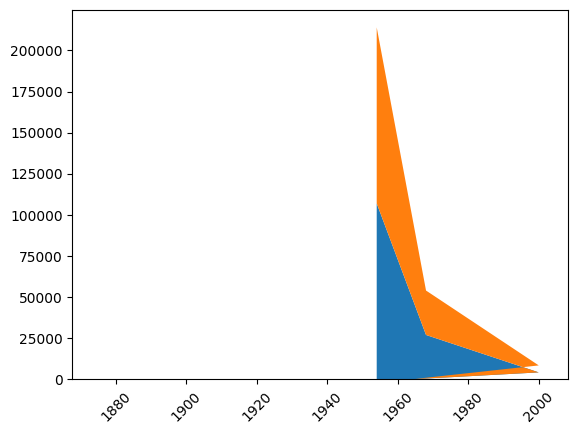

In [73]:
fig,ax = plt.subplots()
ax.stackplot(data[data['class']=='L5'].iloc[:,[0,4,6]].sort_values('mass',ascending=False).loc[:,'year'].head(10),[data[data['class']=='EH4'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'mass'].head(10),data[data['class']=='EH4'].iloc[:,[0,4]].sort_values('mass',ascending=False).loc[:,'mass'].head(10)])
plt.xticks(rotation=45)

In [10]:
data

,name,id,name_type,class,mass,fall,year,lat,long,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


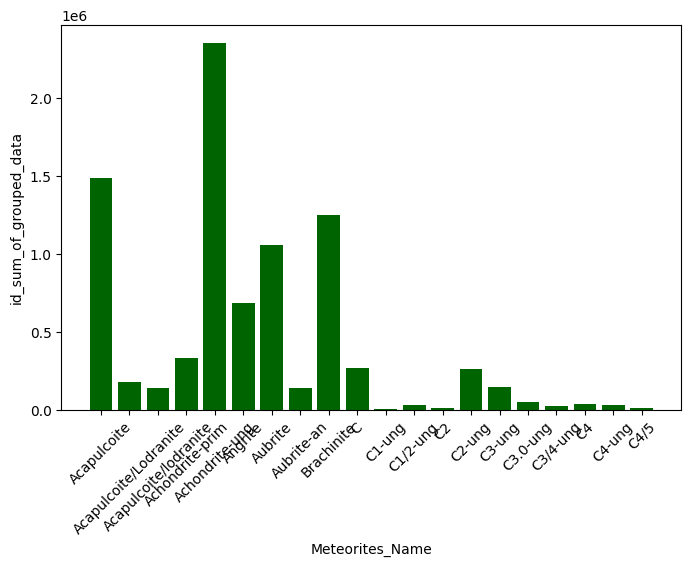

In [70]:
fig,ax = plt.subplots(figsize=(8,5))
ax.bar(np.array(data.groupby('class').sum('id').index)[0:20],data.groupby('class').sum('id').iloc[0:20,0],color='darkgreen')
ax.set_xlabel("Meteorites_Name")
ax.set_ylabel("id_sum_of_grouped_data")
plt.xticks(rotation=45)
plt.show()

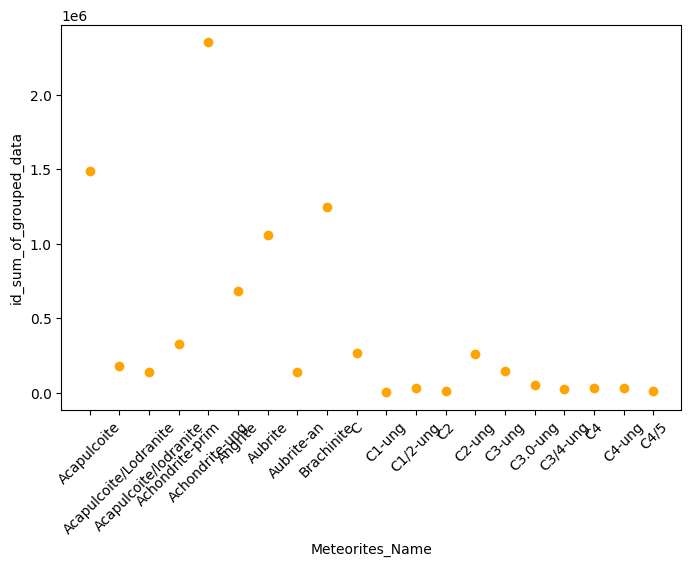

In [69]:
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(np.array(data.groupby('class').sum('id').index)[0:20],data.groupby('class').sum('id').iloc[0:20,0],color='orange')
ax.set_xlabel("Meteorites_Name")
ax.set_ylabel("id_sum_of_grouped_data")
plt.xticks(rotation=45)
plt.show()

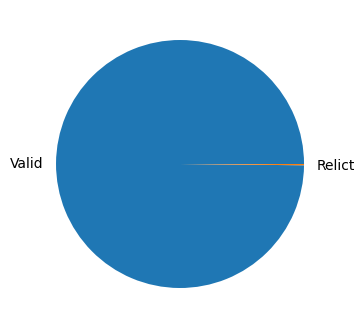

In [91]:
fig,ax = plt.subplots(figsize=(4,5))

valid_relict = [data[data['name_type']=='Valid'].iloc[:,2].count(),data[data['name_type']=='Relict'].iloc[:,2].count()]
ax.pie(valid_relict,labels=(['Valid','Relict']))
plt.show()

In [92]:
data

,name,id,name_type,class,mass,fall,year,lat,long,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


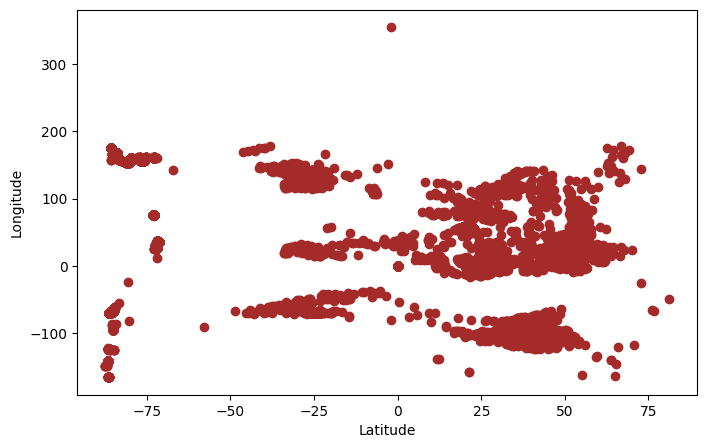

In [104]:
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(data['lat'],data['long'],color='brown')
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
plt.show()

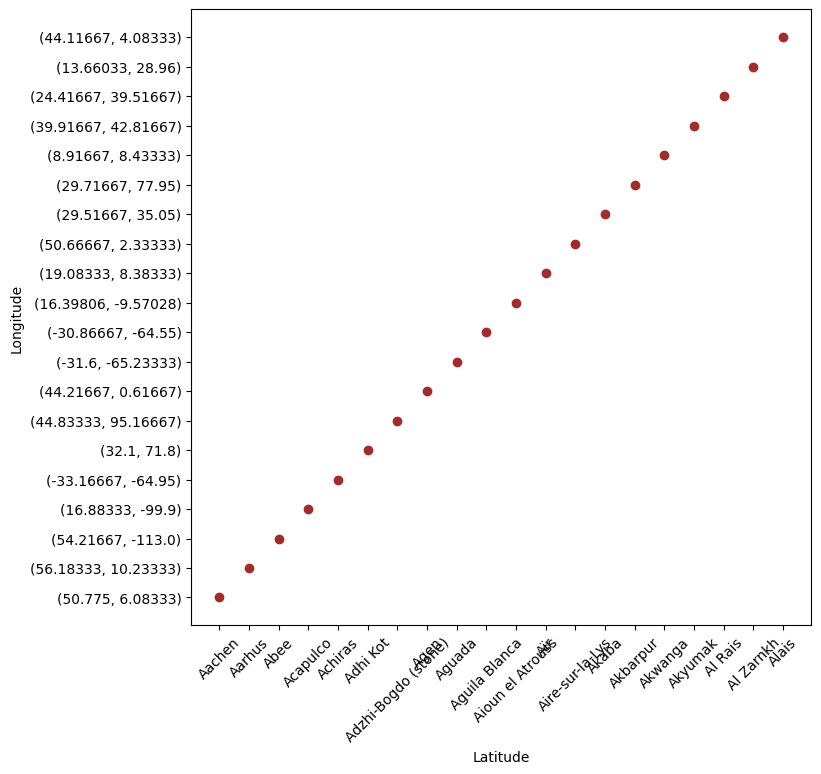

In [113]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(data['name'].head(20),data['geolocation'].head(20),color='brown')
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
plt.xticks(rotation=45)
plt.show()